## Задание 1
Написать конвертре из одного цветового пространства в другое

In [1]:
# Пишем преобразование из rgb в hsv

На просторах интернета найден алгоритм

1. Divide r, g, b by 255
2. Compute cmax, cmin, difference

Hue calculation : 

3. if cmax and cmin equal 0, then h = 0
4. if cmax equal r then compute h = (60 * ((g – b) / diff) + 360) % 360
5. if cmax equal g then compute h = (60 * ((b – r) / diff) + 120) % 360
6. if cmax equal b then compute h = (60 * ((r – g) / diff) + 240) % 360

Saturation computation : 

7. if cmax = 0, then s = 0
8. if cmax does not equal 0 then compute s = (diff/cmax)*100

Value computation : 

9. v = cmax*100

In [24]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [9]:
rgb = np.array((123, 2, 0), dtype=float)

In [10]:
rgb

array([123.,   2.,   0.])

In [11]:
rgb/=255

In [12]:
rgb

array([0.48235294, 0.00784314, 0.        ])

In [15]:
rgb.argmax()

0

In [126]:
def rgb2hsv(rgb):
    rgb = rgb.astype(float)
    rgb /= 255
    
    cmax = rgb.max()
    cmin = rgb.min()
    diff = cmax - cmin
    
    hsv = np.zeros(3)
    
    # HUE
    if cmax != cmin:
        if rgb.argmax() == 0:
            hsv[0] = (60 * ((rgb[1] - rgb[2]) / diff) + 360) % 360
        if rgb.argmax() == 1:
            hsv[0] = (60 * ((rgb[2] - rgb[0]) / diff) + 120) % 360
        if rgb.argmax() == 2:
            hsv[0] = (60 * ((rgb[0] - rgb[1]) / diff) + 240) % 360
        
    # SAT
    if cmax != 0:
        hsv[1] = (diff / cmax) * 100
        
    # VAL
    hsv[2] = cmax * 100
    
    return hsv

In [19]:
image = Image.open('landing-top.png')

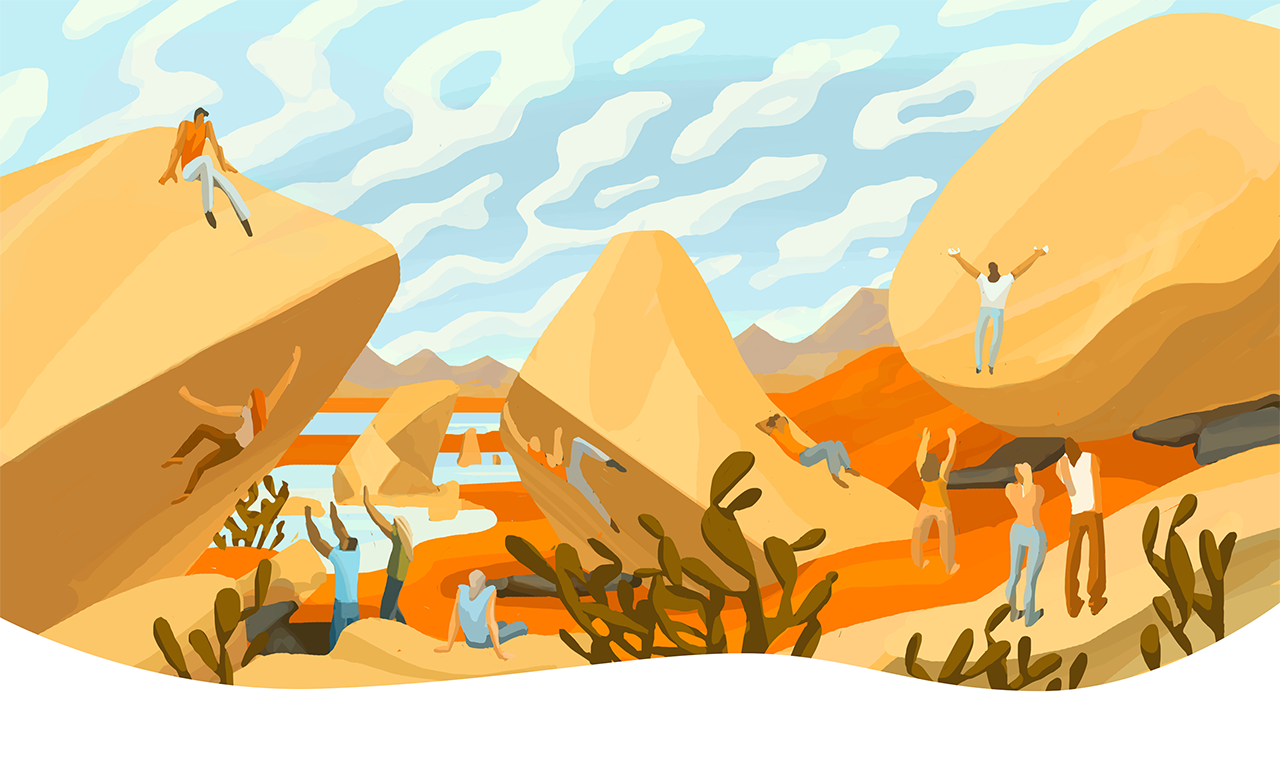

In [111]:
image

In [21]:
np_image = np.array(image)

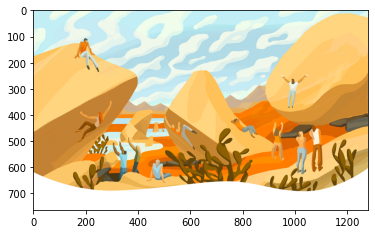

In [25]:
plt.imshow(np_image)

In [26]:
np_image.shape

(763, 1280, 4)

In [34]:
# Тут еще альфа канал в png-шке.. ну нам он не интересен, будет мешать при нахождении максимумов

In [32]:
np_image = np_image[:, :, :3]

In [35]:
np_image.shape

(763, 1280, 3)

In [37]:
np_image.reshape((np_image.shape[0] * np_image.shape[1], 3))

array([[193, 239, 245],
       [193, 239, 245],
       [193, 239, 245],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [127]:
rgb2hsv_vec = np.vectorize(rgb2hsv, signature='(3)->(3)')

In [128]:
hsv_image = rgb2hsv_vec(np_image.reshape((np_image.shape[0] * np_image.shape[1], 3))).reshape((
    np_image.shape[0], np_image.shape[1], 3))

In [78]:
hsv_image.shape

(763, 1280, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


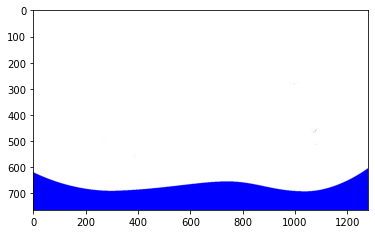

In [79]:
plt.imshow(hsv_image)

In [80]:
# Ну окей.. hsv как rgb показывать не особо интересно.. Попробуем обратно

In [107]:
pil_hsv_image = Image.fromarray(hsv_image.astype('int8'), mode='HSV')

In [108]:
pil_rgb_image = pil_hsv_image.convert(mode="RGB")

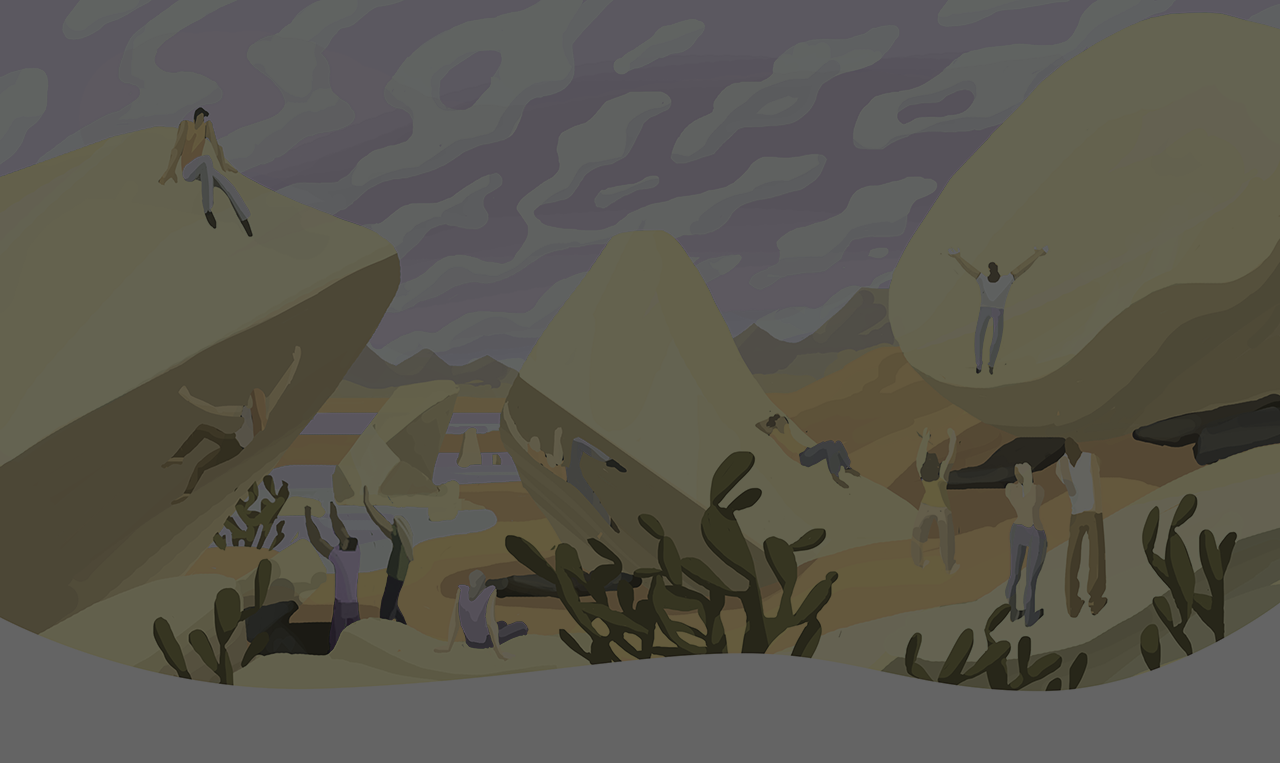

In [109]:
pil_rgb_image

In [101]:
# Ну.. некое соответствие присутствует, но в целом цвета мы слегка потеряли )

In [131]:
# Возможно PIL имеет всетаки свое представление о модели hsv :))
# Сейчас проверим
np.array(image.convert(mode='HSV'))[1, 1, :]

array([132,  54, 245], dtype=uint8)

In [132]:
# А у нас..
hsv_image[1, 1, :]

array([186.92307692,  21.2244898 ,  96.07843137])

In [134]:
# А в RGB это было
np.array(image)[1, 1, :3]

array([193, 239, 245], dtype=uint8)

In [136]:
# Посчитаем руками по формуле

In [137]:
np.array(image)[1, 1, :3]/256

array([0.75390625, 0.93359375, 0.95703125])

In [138]:
# максимальный B = 0.957
# diff = 0.957 - 0.7539 = 0.203


0.20309999999999995

In [139]:
# H = 
(60 * ((0.7539 - 0.93359) / 0.20309) + 240) % 360

186.91319119602144

In [141]:
# S =
(0.20309999999999995 / 0.95703125) * 100

21.221877551020402

In [142]:
# V = 
0.95703125 * 100

95.703125

In [143]:
# Вобщем все верно считается.. видимо найденный алгоритм не совпадает с тем, что использует PIL

In [ ]:
im